# CONTEXT UNDERSTANDING

## **Business Context**

Sebuah perusahaan ingin mengetahui gambaran umum tentang karyawan yang bekerja pada perusahaan mereka. Terdapat sebuah database yang menunjukan detail dari proses transaksi. Dari database tersebut, perusahaan ingin bisa mendapatkan insight yang dapat dijalankan, sehingga nantinya mereka dapat melakukan penerapan strategi yang tepat sasaran untuk memperoleh keuntungan yang lebih dari saat ini.


## **Database Information**

Sumber Database: https://www.mysqltutorial.org/wp-content/uploads/2018/03/mysqlsampledatabase.zip

Database yang dimiliki mempunyai 13 tabel, yaitu:
- Customers            : Menyimpan informasi tentang data pelanggan/customer.
- CustomerCustomerDemo : Menyimpan informasi tentang deskripsi pelanggan, tapi ketika dilihat tidak terdapat data apapun.
- CustomerDemographics : Menyimpan informasi tentang demografi pelanggan, tapi ketika dilihat tidak terdapat data apapun.
- Products             : Menyimpan informasi tentang jenis produk.
- Categories           : Menyimpan informasi tentang kategori produk.
- Orders               : Menyimpan informasi jual-beli yang dilakukan oleh pelanggan.
- OrderDetails         : Menyimpan detail dari setiap pesanan yang dilakukan oleh pelanggan.
- Employees            : Menyimpan semua informasi karyawan serta struktur organisasi, seperti siapa melapor kepada siapa.
- EmployeeTerritories  : Menyimpan informasi tentang teritori dari karyawan.
- Suppliers            : Menyimpan data kantor penjualan.
- Shippers             : Menyimpan informasi tentang pengirim paket.
- Region               : Menyimpan informasi tentang daerah dari karyawan.
- Territories          : Menyimpan informasi tentang teritori.

Setiap tabel yang tertera pada database dapat terhubung, baik secara langsung maupun tidak langsung, sehingga setiap informasi dari database ini akan dapat saling berkaitan.

# DATABASE ACCESS

## **Connecting To Database**

Bagian ini merupakan langkah awal untuk mulai melakukan proses analisis data. Pertama adalah membuat koneksi ke database. Database yang akan digunakan adalah database ``northwind``. Dengan melakukan koneksi ini, kita dapat mengakses seluruh tabel yang ada pada database.


In [209]:
# Import Library
import mysql.connector
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import warnings

warnings.filterwarnings("ignore")

In [210]:
# Mysql Connector Configuration
mydb = mysql.connector.connect(
    host = 'localhost',
    user = 'root',
    passwd = '12345',
    database = 'northwind'
)

# SQL Access Function
def sql_function(yourQuery):
    # create access to database
    mycursor = mydb.cursor()

    # execute query
    mycursor.execute(yourQuery)

    # save the result in 'result' variable
    result = mycursor.fetchall()

    # convert to dataframe and open it
    df = pd.DataFrame(result, columns = mycursor.column_names)
    return df

## **Data Detail & Keuntungan Transaksi**

Data pertama ini merupakan data utama yang nantinya akan dianalisa lebih lanjut. Data ini merupakan gabungan dari 5 tabel, yaitu tabel ```Employees```, ```Region```, ```Products```, ```Orders```, dan ```Order Details```. Masing-masing dari setiap tabel tersebut diambil beberapa kolomnya dan tidak diambil secara keseluruhan. Informasi-informasi yang dianggap penting saja lah yang diambil. Informasi yang diambil antara lain adalah :
- EmployeeID dari tabel employees
- Title dari tabel employees
- TitleOfCourtesy dari tabel employees
- BirthDate dari tabel employees
- HireDate dari tabel employees
- City dari tabel employees
- Country dari tabel employees
- Salary dari tabel employees
- RegionDescription dari tabel region
- UnitPrice dari tabel orderDetails
- Quantity dari tabel orderDetails
- UnitsInStock dari tabel products
- UnitsOnOrder dari tabel products
- CategoryName dari tabel categories


Selain dari tabel, terdapat sebuah kolom juga yang dinamakan ***EmployeesAgeWhenHired*** yang merupakan umur karyawan saat bekerja di perusahaan. Ini merupakan selisih antara BirthDate (Tanggal lahir karyawan) dan HireDate (Waktu saat karyawan direkrut).
Terdapat juga kolom ***Price*** yang merupakan perkalian kolom ***UnitPrice*** dan ***Quantity***. Lalu terdapat ShippingTime yang merupakan indikasi waktu proses shipping.

Semua informasi tersebut kemudian dijadikan dalam sebuah dataframe yang nantinya akan diolah informasinya.

In [211]:
df = sql_function(
    '''
    SELECT  e.EmployeeID, 
            CONCAT(e.FirstName, ' ', e.LastName) FullName,
            e.Title, 
            e.TitleOfCourtesy, 
            e.BirthDate, 
            e.HireDate, 
            ROUND(DATEDIFF(e.HireDate, e.BirthDate)/360, 0) EmployeeAgeWhenHired,
            ROUND(DATEDIFF(o.OrderDate, e.BirthDate)/360, 0) CurrentlyEmployeeAge,
            
            e.City,  
            e.Country, 
            e.Salary,
            
            p.UnitsInStock,
            p.UnitsOnOrder,
            
            c.CategoryName,
            od.UnitPrice,
            od.Quantity,
            (od.UnitPrice*od.Quantity) Price,
            
            o.OrderDate,
            o.ShippedDate,
            ROUND(DATEDIFF(o.ShippedDate, o.OrderDate), 0) ShippingTime
            
            
    FROM employees e
    JOIN Orders o ON o.EmployeeID = e.EmployeeID
    JOIN OrderDetails od ON od.OrderID = o.OrderID
    JOIN Products p ON p.ProductID = od.ProductID
    JOIN Categories c ON c.CategoryID = p.CategoryID
    '''
)

display(df.shape)
display(df)

(2155, 20)

,EmployeeID,FullName,Title,TitleOfCourtesy,BirthDate,HireDate,EmployeeAgeWhenHired,CurrentlyEmployeeAge,City,Country,Salary,UnitsInStock,UnitsOnOrder,CategoryName,UnitPrice,Quantity,Price,OrderDate,ShippedDate,ShippingTime
0,1,Nancy Davolio,Sales Representative,Ms.,1948-12-08,1992-05-01,44,48,Seattle,USA,2954.55,39,0,Beverages,14.4000,45,648.0000,1996-08-20,1996-08-26,6.0
1,4,Margaret Peacock,Sales Representative,Mrs.,1937-09-19,1993-05-03,56,60,Redmond,USA,1861.08,39,0,Beverages,14.4000,18,259.2000,1996-08-30,1996-09-05,6.0
2,6,Michael Suyama,Sales Representative,Mr.,1963-07-02,1993-10-17,31,34,London,UK,2004.07,39,0,Beverages,14.4000,20,288.0000,1996-09-30,1996-10-10,10.0
3,4,Margaret Peacock,Sales Representative,Mrs.,1937-09-19,1993-05-03,56,60,Redmond,USA,1861.08,39,0,Beverages,14.4000,15,216.0000,1996-11-07,1996-11-15,8.0
4,8,Laura Callahan,Inside Sales Coordinator,Ms.,1958-01-09,1994-03-05,37,39,Seattle,USA,2100.50,39,0,Beverages,14.4000,12,172.8000,1996-11-14,1996-11-20,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2150,3,Janet Leverling,Sales Representative,Ms.,1963-08-30,1992-04-01,29,35,Kirkland,USA,3119.15,101,0,Seafood,15.0000,15,225.0000,1997-10-06,1997-10-10,4.0
2151,6,Michael Suyama,Sales Representative,Mr.,1963-07-02,1993-10-17,31,35,London,UK,2004.07,101,0,Seafood,15.0000,35,525.0000,1997-10-14,1997-10-20,6.0
2152,3,Janet Leverling,Sales Representative,Ms.,1963-08-30,1992-04-01,29,35,Kirkland,USA,3119.15,101,0,Seafood,15.0000,15,225.0000,1997-11-24,1997-12-03,9.0
2153,4,Margaret Peacock,Sales Representative,Mrs.,1937-09-19,1993-05-03,56,61,Redmond,USA,1861.08,101,0,Seafood,15.0000,10,150.0000,1998-02-11,1998-02-18,7.0


# DATA PREPARATION & MANIPULATION

Sebelum melakukan analisis pada data, terlebih dahulu akan dilakukan manipulasi data terkait anomali seperti missing value, kesalahan tipe data, outlier, dan data duplikat. Pada bagian ini, data akan 'dibersihkan', sehingga output akhir yang diharapkan adalah terdapat sebuah dataset yang bersih yang dapat dianalisis lebih lanjut dengan menampilkan visualisasi, serta melihat statistiknya.

## Anomalies In Data Type

Untuk mengecek kesalahan tipe data, akan coba ditampilkan 5 data teratas kemudian dibandingkan dengan general info dari dataframe

In [212]:
# Cek 5 data teratas
df.head()

,EmployeeID,FullName,Title,TitleOfCourtesy,BirthDate,HireDate,EmployeeAgeWhenHired,CurrentlyEmployeeAge,City,Country,Salary,UnitsInStock,UnitsOnOrder,CategoryName,UnitPrice,Quantity,Price,OrderDate,ShippedDate,ShippingTime
0,1,Nancy Davolio,Sales Representative,Ms.,1948-12-08,1992-05-01,44,48,Seattle,USA,2954.55,39,0,Beverages,14.4000,45,648.0000,1996-08-20,1996-08-26,6.0
1,4,Margaret Peacock,Sales Representative,Mrs.,1937-09-19,1993-05-03,56,60,Redmond,USA,1861.08,39,0,Beverages,14.4000,18,259.2000,1996-08-30,1996-09-05,6.0
2,6,Michael Suyama,Sales Representative,Mr.,1963-07-02,1993-10-17,31,34,London,UK,2004.07,39,0,Beverages,14.4000,20,288.0000,1996-09-30,1996-10-10,10.0
3,4,Margaret Peacock,Sales Representative,Mrs.,1937-09-19,1993-05-03,56,60,Redmond,USA,1861.08,39,0,Beverages,14.4000,15,216.0000,1996-11-07,1996-11-15,8.0
4,8,Laura Callahan,Inside Sales Coordinator,Ms.,1958-01-09,1994-03-05,37,39,Seattle,USA,2100.50,39,0,Beverages,14.4000,12,172.8000,1996-11-14,1996-11-20,6.0


In [213]:
# Cek general information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   EmployeeID            2155 non-null   int64         
 1   FullName              2155 non-null   object        
 2   Title                 2155 non-null   object        
 3   TitleOfCourtesy       2155 non-null   object        
 4   BirthDate             2155 non-null   datetime64[ns]
 5   HireDate              2155 non-null   datetime64[ns]
 6   EmployeeAgeWhenHired  2155 non-null   object        
 7   CurrentlyEmployeeAge  2155 non-null   object        
 8   City                  2155 non-null   object        
 9   Country               2155 non-null   object        
 10  Salary                2155 non-null   float64       
 11  UnitsInStock          2155 non-null   int64         
 12  UnitsOnOrder          2155 non-null   int64         
 13  CategoryName      

Dari tabel dan info tabel, dapat dilihat jika terdapat kesalahan tipe data pada kolom ***EmployeeAgeWhenHired***, ***CurrentlyEmployeeAge***, ***UnitPrice***, dan ***Price***. Ketiga kolom tersebut memiliki tipe data object, seharusnya kolom ini memiliki tipe data numerik (float, int). Maka dari itu tipe data kolom UnitPrice akan diubah menjadi float.

In [214]:
# Ubah tipe data
df['EmployeeAgeWhenHired'] = df['EmployeeAgeWhenHired'].astype('int')
df['CurrentlyEmployeeAge'] = df['CurrentlyEmployeeAge'].astype('int')
df['UnitPrice'] = df['UnitPrice'].astype('float')
df['Price'] = df['Price'].astype('float')

Setelah menjalankan sintax di atas, seharusnya tipe data setiap kolom terkait telah berubah. Untuk memastikan hal tersebut, akan dilakukan lagi pengecekan general info dari dataframe

In [215]:
# Recheck
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   EmployeeID            2155 non-null   int64         
 1   FullName              2155 non-null   object        
 2   Title                 2155 non-null   object        
 3   TitleOfCourtesy       2155 non-null   object        
 4   BirthDate             2155 non-null   datetime64[ns]
 5   HireDate              2155 non-null   datetime64[ns]
 6   EmployeeAgeWhenHired  2155 non-null   int32         
 7   CurrentlyEmployeeAge  2155 non-null   int32         
 8   City                  2155 non-null   object        
 9   Country               2155 non-null   object        
 10  Salary                2155 non-null   float64       
 11  UnitsInStock          2155 non-null   int64         
 12  UnitsOnOrder          2155 non-null   int64         
 13  CategoryName      

Dari tabel tersebut, dapat terlihat bahwa tipe data kolom ***UnitPrice***, ***Price*** dan ***EmployeeAgeWhenHired*** berhasil berubah menjadi tipe data numerik (float dan int).

## Statistics Descriptive

Untuk pengecekatan deskripsi statistik dari setiap kolom numerik dan kategorikal akan dilakukan dengan fungsi ***Describe()***. Selain itu, pada fungsi ***Describe()*** dapat juga dilihat anomali berupa outlier. Akan tetapi untuk pembahasan mengenai outlier akan dijelaskan lebih lanjut di bagian selanjutnya.

In [216]:
# Statistik data numerik
df.describe().T

,count,mean,std,min,25%,50%,75%,max
EmployeeID,2155.0,4.333179,2.490351,1.00,2.00,4.0,7.00,9.00
EmployeeAgeWhenHired,2155.0,40.077958,9.328845,29.00,31.00,39.0,44.00,56.00
CurrentlyEmployeeAge,2155.0,44.577262,9.578147,31.00,35.00,43.0,50.00,62.00
Salary,2155.0,2335.321592,491.333091,1744.21,1991.55,2100.5,2954.55,3119.15
UnitsInStock,2155.0,39.795824,36.055668,0.00,17.00,25.0,57.00,125.00
UnitsOnOrder,2155.0,8.074246,19.748983,0.00,0.00,0.0,0.00,100.00
UnitPrice,2155.0,26.218520,29.827418,2.00,12.00,18.4,32.00,263.50
Quantity,2155.0,23.812993,19.022047,1.00,10.00,20.0,30.00,130.00
Price,2155.0,628.519067,1036.466980,4.80,154.00,360.0,722.25,15810.00
ShippingTime,2082.0,8.345341,6.692846,1.00,4.00,7.0,9.00,37.00


Dari deskripsi statistik kolom numerik di atas, terdapat sebuah keanehan pada deskripsi kolom ***UnitsOnOrder***. Nilai Q1, Q2, dan Q3 pada kolom tersebut adalah 0. Akan coba dilakukan pengecekan lebih lanjut di bawah ini.

In [217]:
df['UnitsOnOrder'].value_counts().sort_index()

0      1707
10      151
20       13
30       38
40       98
50        6
60       21
70       83
80       30
100       8
Name: UnitsOnOrder, dtype: int64

Dari hasil di atas dapat terlihat bahwa terdapat frekuensi yang sangat tinggi pada value 0 jika dibandingkan dengan value lainnya. Lebih lanjut akan coba dibuat boxplot dan distplot untuk kolom ini, diduga memiliki distribusi longtail.

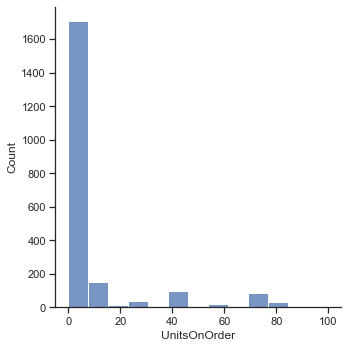

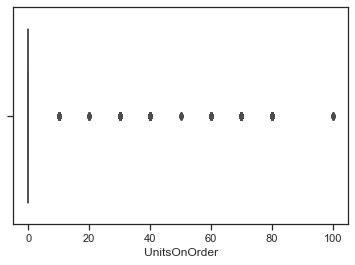

In [218]:
sns.set(style="ticks")
sns.displot(df['UnitsOnOrder'])
plt.show()

sns.set(style="ticks")
sns.boxplot(df['UnitsOnOrder'])
plt.show()

Dapat terlihat bahwa kolom/fitur tersebut berdistribusi longtail. Pada boxplot juga menunjukkan bahwa kolom tersebut memiliki Q1, Q2, dan Q3 bernilai 0. Hal ini menjadi wajar dan sering terjadi ketika distribusi suatu fitur berbentuk longtail. Selanjutkan akan dicek deskripsi statistik dari kolom kategorikal.

In [219]:
# Statistik data kategorikal
df.describe(include='object').T

,count,unique,top,freq
FullName,2155,9,Margaret Peacock,420
Title,2155,4,Sales Representative,1537
TitleOfCourtesy,2155,4,Ms.,1033
City,2155,5,Seattle,605
Country,2155,2,USA,1587
CategoryName,2155,8,Beverages,404


## Missing Value

Pengecekan missing value pada bagian ini menggunakan msno matrix. Dengan matrix ini, kita dapat melihat sebaran index missing value pada setiap kolom. Berikut adalah visualisasinya.

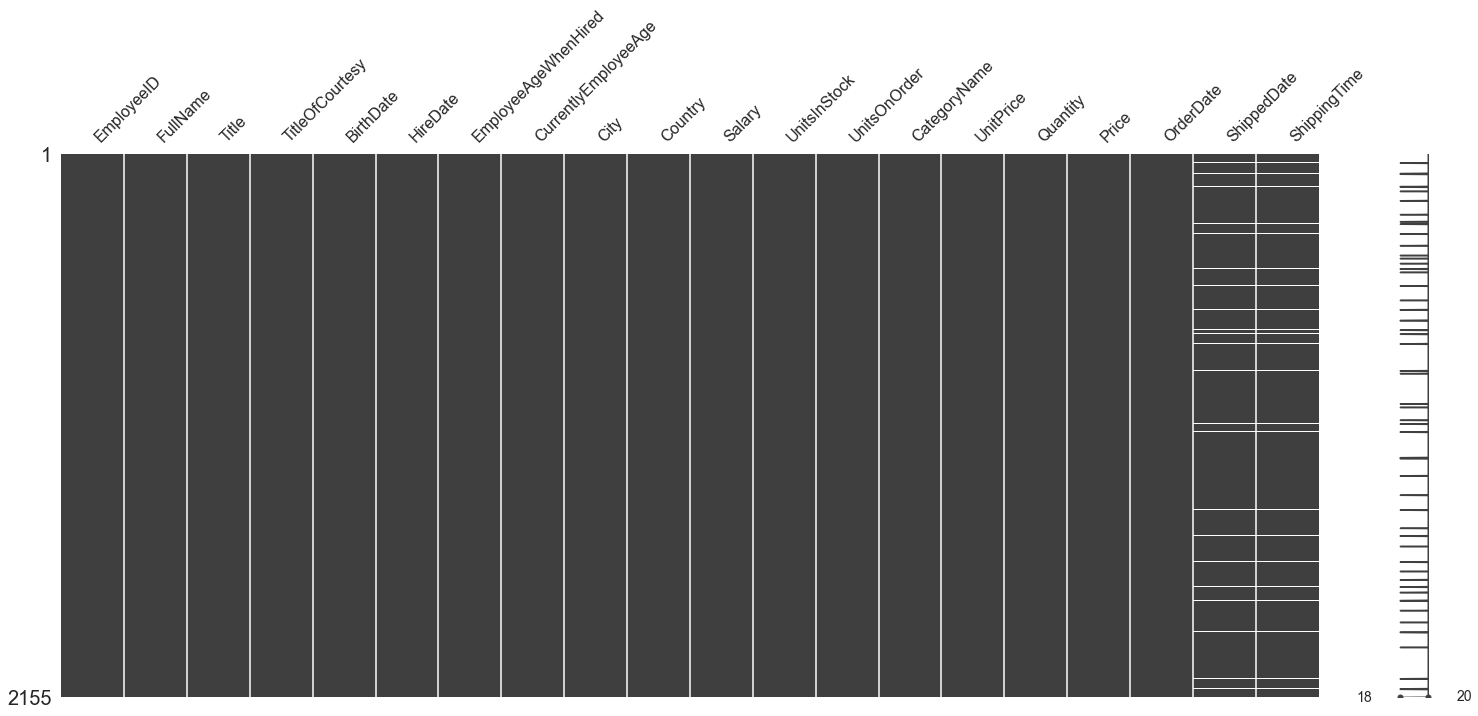

In [220]:
# Melhat missing value dengan msno matrix
msno.matrix(df)
plt.show()

Pada matrix missing value yang dibuat menggunakan library missingno (msno), dapat terlihat bahwa terdapat missing value pada  kolom ***ShippedDate***. Berikut adalah pengecekan lebih lanjut persentase missing value dari dataset terkait.

In [221]:
# Cek missing value
pd.DataFrame((df.isnull().sum()/df.shape[0])*100).rename(columns={0: 'Persentase Missing Value (%)'})

,Persentase Missing Value (%)
EmployeeID,0.000000
FullName,0.000000
Title,0.000000
TitleOfCourtesy,0.000000
BirthDate,0.000000
HireDate,0.000000
EmployeeAgeWhenHired,0.000000
CurrentlyEmployeeAge,0.000000
City,0.000000
Country,0.000000


Dari tabel di atas, dapat dikatakan bahwa terdapat kolom yang memiliki missing value yaitu ***ShippedDate dan ShippingTime*** yaitu sebesar 3.38%. Penyebab terdapatnya missing value pada dataset ini tidak dapat dipastikan. Untuk penanganan missing value, data-data yang memiliki missing value akan dihapus/didrop.

In [222]:
print(df.shape)
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
print(df.shape)

df

(2155, 20)
(2082, 20)


,EmployeeID,FullName,Title,TitleOfCourtesy,BirthDate,HireDate,EmployeeAgeWhenHired,CurrentlyEmployeeAge,City,Country,Salary,UnitsInStock,UnitsOnOrder,CategoryName,UnitPrice,Quantity,Price,OrderDate,ShippedDate,ShippingTime
0,1,Nancy Davolio,Sales Representative,Ms.,1948-12-08,1992-05-01,44,48,Seattle,USA,2954.55,39,0,Beverages,14.4,45,648.0,1996-08-20,1996-08-26,6.0
1,4,Margaret Peacock,Sales Representative,Mrs.,1937-09-19,1993-05-03,56,60,Redmond,USA,1861.08,39,0,Beverages,14.4,18,259.2,1996-08-30,1996-09-05,6.0
2,6,Michael Suyama,Sales Representative,Mr.,1963-07-02,1993-10-17,31,34,London,UK,2004.07,39,0,Beverages,14.4,20,288.0,1996-09-30,1996-10-10,10.0
3,4,Margaret Peacock,Sales Representative,Mrs.,1937-09-19,1993-05-03,56,60,Redmond,USA,1861.08,39,0,Beverages,14.4,15,216.0,1996-11-07,1996-11-15,8.0
4,8,Laura Callahan,Inside Sales Coordinator,Ms.,1958-01-09,1994-03-05,37,39,Seattle,USA,2100.50,39,0,Beverages,14.4,12,172.8,1996-11-14,1996-11-20,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2077,4,Margaret Peacock,Sales Representative,Mrs.,1937-09-19,1993-05-03,56,61,Redmond,USA,1861.08,101,0,Seafood,15.0,50,750.0,1997-09-16,1997-09-18,2.0
2078,3,Janet Leverling,Sales Representative,Ms.,1963-08-30,1992-04-01,29,35,Kirkland,USA,3119.15,101,0,Seafood,15.0,15,225.0,1997-10-06,1997-10-10,4.0
2079,6,Michael Suyama,Sales Representative,Mr.,1963-07-02,1993-10-17,31,35,London,UK,2004.07,101,0,Seafood,15.0,35,525.0,1997-10-14,1997-10-20,6.0
2080,3,Janet Leverling,Sales Representative,Ms.,1963-08-30,1992-04-01,29,35,Kirkland,USA,3119.15,101,0,Seafood,15.0,15,225.0,1997-11-24,1997-12-03,9.0


In [223]:
# Recheck
pd.DataFrame((df.isnull().sum()/df.shape[0])*100).rename(columns={0: 'Persentase Missing Value (%)'})

,Persentase Missing Value (%)
EmployeeID,0.0
FullName,0.0
Title,0.0
TitleOfCourtesy,0.0
BirthDate,0.0
HireDate,0.0
EmployeeAgeWhenHired,0.0
CurrentlyEmployeeAge,0.0
City,0.0
Country,0.0


Data dengan missing value berhasil dihapus, hal ini diindikasikan oleh berkurangnya jumlah data dari 2155 ke 2082 data. Ketika diperiksa ulang persentase missing value, persentase semua kolom yaitu 0% yang artinya sudah tidak terdapat missing value pada data.

## Outlier

In [224]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
EmployeeID,2082.0,4.360711,2.471958,1.00,2.00,4.0,7.00,9.00
EmployeeAgeWhenHired,2082.0,39.994236,9.382469,29.00,31.00,39.0,44.00,56.00
CurrentlyEmployeeAge,2082.0,44.463977,9.612927,31.00,35.00,43.0,50.00,61.00
Salary,2082.0,2331.549313,492.111194,1744.21,1861.08,2100.5,2954.55,3119.15
UnitsInStock,2082.0,39.762728,36.062315,0.00,17.00,25.0,57.00,125.00
UnitsOnOrder,2082.0,7.949087,19.569399,0.00,0.00,0.0,0.00,100.00
UnitPrice,2082.0,26.379500,30.224352,2.00,12.00,18.4,32.00,263.50
Quantity,2082.0,24.072526,18.890082,1.00,10.00,20.0,30.00,130.00
Price,2082.0,637.375038,1045.838694,4.80,159.00,364.8,736.00,15810.00
ShippingTime,2082.0,8.345341,6.692846,1.00,4.00,7.0,9.00,37.00


Dari tabel deskripsi di atas, dapat dilihat metrics min, Q1, Q2, Q3, dan max dapat terlihat kecenderungan outlier pada beberapa kolom. Contohnya pada kolom ***UnitPrice, UnitsInStock, UnitsOnOrder, dan Quantity***. Jika dibandingkan nilai max memiliki nilai yang cenderung jauh dengan Q1, Q2, dan Q3, sehingga diperkirakan kolom-kolom tersebut memiliki outlier. Untuk pengecekan lebih lanjut akan dilihat menggunakan boxplot seperti di bawah ini.

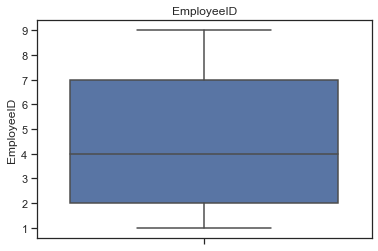

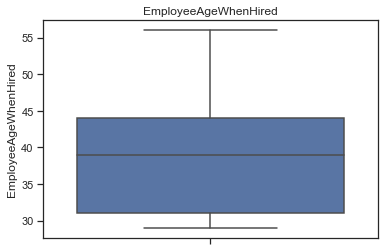

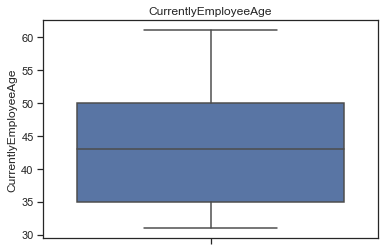

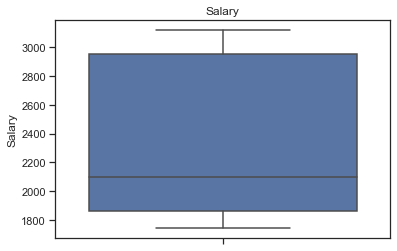

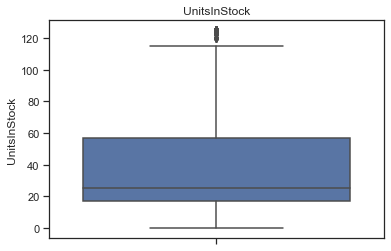

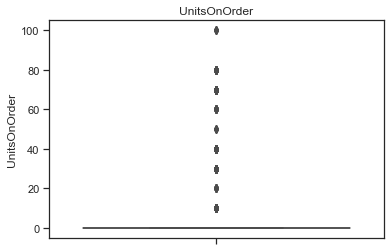

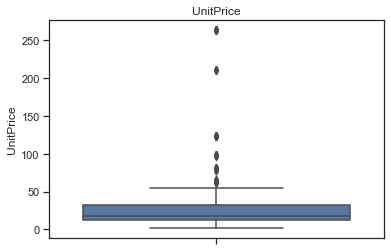

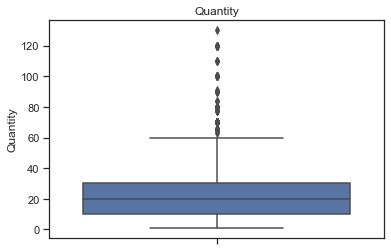

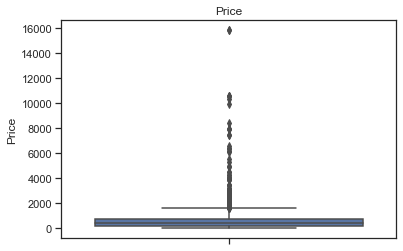

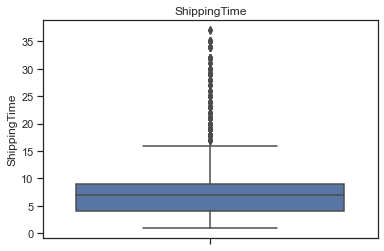

In [225]:
for col in df.describe().columns.tolist():
    sns.set(style="ticks")
    sns.boxplot(data=df, y=col)
    plt.title(col)
    plt.show()

Jika dibuat boxplot, maka dapat terlihat bahwa kolom yang memiliki outlier adalah ***Salary, UnitPrice, Quantity, UnitsInStock, UnitsOnOrder, dan Price***. Terdapat beberapa macam penanganan outlier, contohnya menghapus index yang berisi nilai outlier atau menggunakan metode ***winsorization***.

Metode ***winsorization*** merupakan metode untuk mengganti beberapa persen persentil atas dan bawah (dapat disebut batas atas dan bawah, biasanya 5%) dengan batas persentil tersebut. Tapi pada analisis ini karena tidak dibuat hingga ke model Machine Learning. Maka penanganan outlier menjadi tidak wajib.

## Duplicate Data

Anomali berikutnya yang bisa ditemui adalah data yang duplikat. Tentu saja data yang bersifat duplikat ini akan menjadi sesuatu hal yang akan mengganggu proses analisis data. Untuk itu akan dicoba untuk melihat data duplikat seperti di bawah ini.

In [226]:
df[df.duplicated(subset=None, keep='first')]

,EmployeeID,FullName,Title,TitleOfCourtesy,BirthDate,HireDate,EmployeeAgeWhenHired,CurrentlyEmployeeAge,City,Country,Salary,UnitsInStock,UnitsOnOrder,CategoryName,UnitPrice,Quantity,Price,OrderDate,ShippedDate,ShippingTime


Dari tabel di atas, dapat dilihat bahwa pada data ini tidak memiliki data duplikat sehingga proses berhenti sampai di sini.

# DATA VISUALIZATION AND STATISTICS

## Data Distribution

In [227]:
# Uji Normalitas Pada UnitPrice dan Price
from scipy.stats import shapiro
    
def normality_test(col):
    norm, pval = shapiro(df_new[col])
    alpha = 0.05

    if pval < alpha:
        print (f'Tolak H0 Karena P-Value ({pval} < 5%)')
        print (f"DATA '{col}' TIDAK BERDISTRIBUS NORMAL")
    else:
        print (f'Gagal Tolak H0 Karena P-Value ({pval} > 5%)')
        print (f"DATA '{col}' BERDISTRIBUS NORMAL")
        
print("1. Uji normalitas pada kolom 'UnitPrice':\n")
normality_test('UnitPrice')

print("\n\n2. Uji normalitas pada kolom 'Price':\n")
normality_test('Price')

1. Uji normalitas pada kolom 'UnitPrice':

Tolak H0 Karena P-Value (0.0 < 5%)
DATA 'UnitPrice' TIDAK BERDISTRIBUS NORMAL


2. Uji normalitas pada kolom 'Price':

Tolak H0 Karena P-Value (0.0 < 5%)
DATA 'Price' TIDAK BERDISTRIBUS NORMAL


Dari uji statistik di atas, dapat disimpulkan bahwa kolom ***UnitPrice dan Price*** tidak berdistribusi normal. Untuk pengecekan lebih lanjut akan dilakukan visualisasi data untuk mengetahui distribusi dari kolom terkait.

In [228]:
def distribution_(col):
    sns.set(style="ticks")
    plt.figure(figsize=(10,10))
    sns.histplot(data=df, x=col)
    plt.title(col, fontsize=15)
    plt.show()
    
def count_plot_(col):
    sns.set(style="ticks")
    plt.figure(figsize=(10,10))
    sns.countplot(data=df, x=col)
    plt.title(col, fontsize=15)
    plt.xticks(rotation=45)
    plt.show()
    
num_ = ['UnitsInStock', 'UnitsOnOrder', 'UnitPrice', 'Quantity', 'Price']
count_ = ['Country', 'CategoryName']

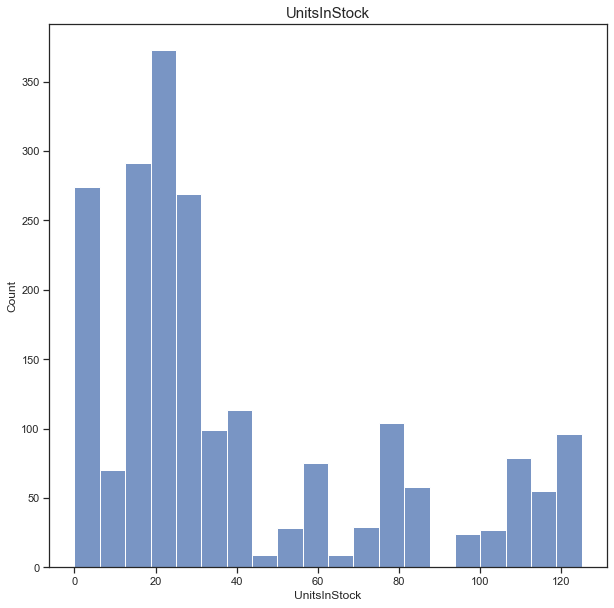

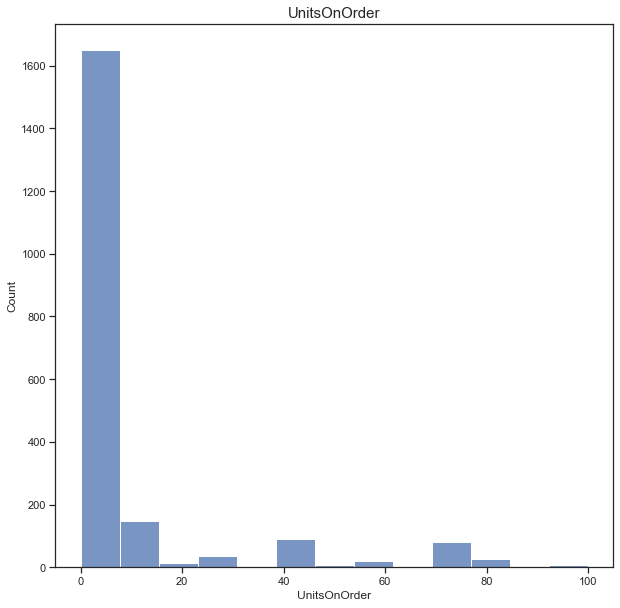

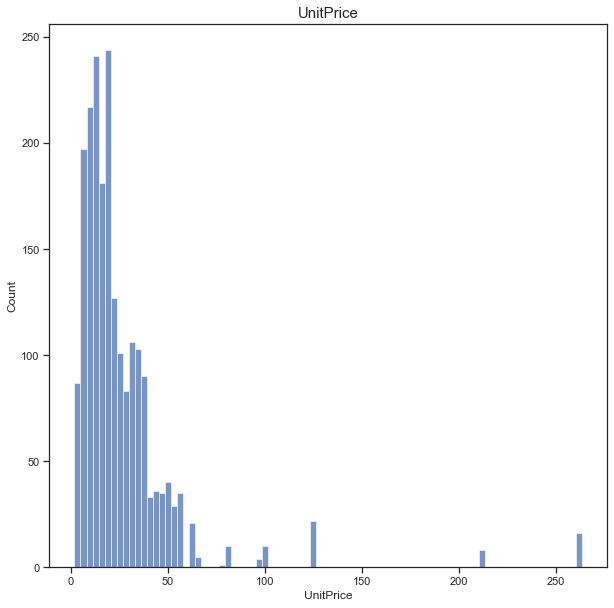

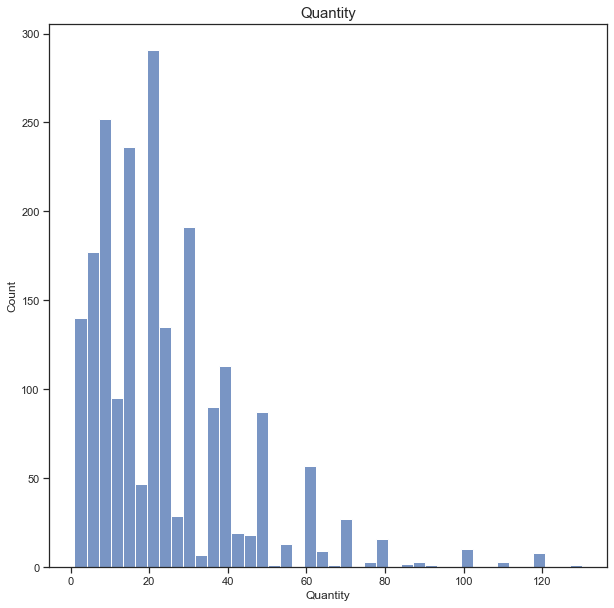

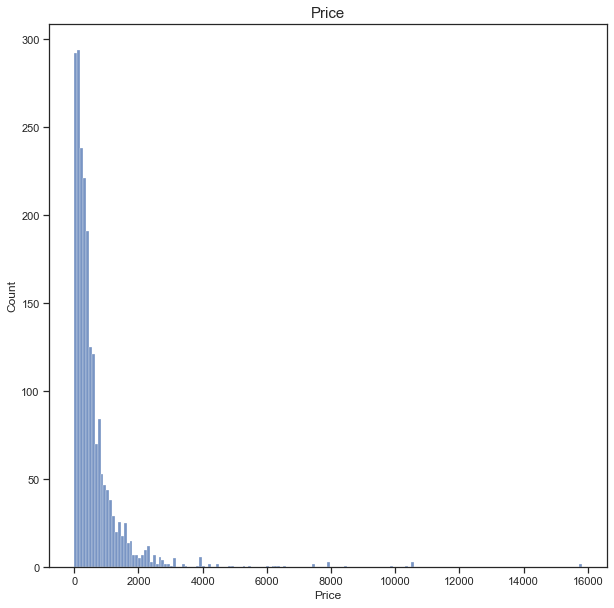

In [229]:
for col in num_:
    distribution_(col)

Dari grafik histogram di atas, dapat terlihat bahwa kolom ***UnitPrice dan Price*** berdistribusi long-tail/right skewed. Selanjutnya akan dibuat plot tentang distribusi (countplot) pada beberapa data kategorikal seperti di bawah ini.

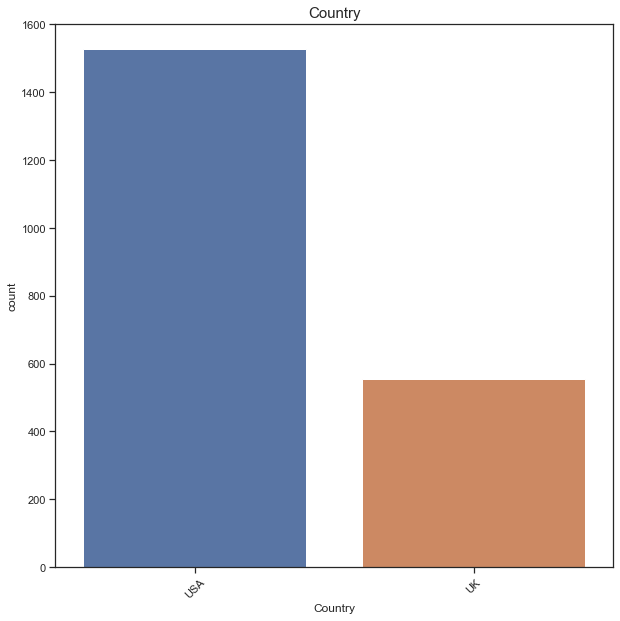

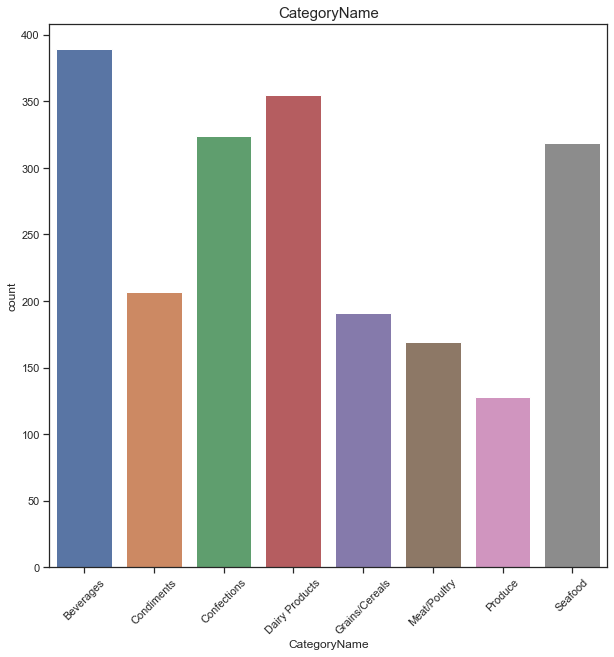

In [230]:
for col in count_:
    count_plot_(col)

## Is there any salary increase of every employee in time interval?

Dari dataset yang telah dibuat, terdapat 9 data karyawan yang tercatat. Dari data karyawan terkait, ingin diidentifikasi lebih lanjut mengenai gaji oleh setiap karyawan pada interval waktu yang ada pada data. Apakah terdapat kenaikan gaji atau tidak pada setiap karyawan ketika telah menempuh waktu tertentu.

In [231]:
print(f"Interval waktu pada dataset berlangsung dari tanggal {df['OrderDate'].min()} hingga {df['OrderDate'].max()}.")

Interval waktu pada dataset berlangsung dari tanggal 1996-07-04 00:00:00 hingga 1998-05-04 00:00:00.


In [232]:
df_sal = df.groupby(['FullName', 'Title'], as_index=False)['Salary'].min().sort_values('Salary', ascending=False)
df_sal2 = df.groupby(['FullName', 'Title'], as_index=False)['Salary'].max().sort_values('Salary', ascending=False)

df_sal.rename(columns={'Salary': 'Min Salary In Time Interval'}, inplace=True)
df_sal['Max Salary In Time Interval'] = df_sal2['Salary']

df_sal.reset_index(drop=True, inplace=True)
df_sal

,FullName,Title,Min Salary In Time Interval,Max Salary In Time Interval
0,Janet Leverling,Sales Representative,3119.15,3119.15
1,Nancy Davolio,Sales Representative,2954.55,2954.55
2,Anne Dodsworth,Sales Representative,2333.33,2333.33
3,Andrew Fuller,"Vice President, Sales",2254.49,2254.49
4,Laura Callahan,Inside Sales Coordinator,2100.50,2100.50
5,Michael Suyama,Sales Representative,2004.07,2004.07
6,Robert King,Sales Representative,1991.55,1991.55
7,Margaret Peacock,Sales Representative,1861.08,1861.08
8,Steven Buchanan,Sales Manager,1744.21,1744.21


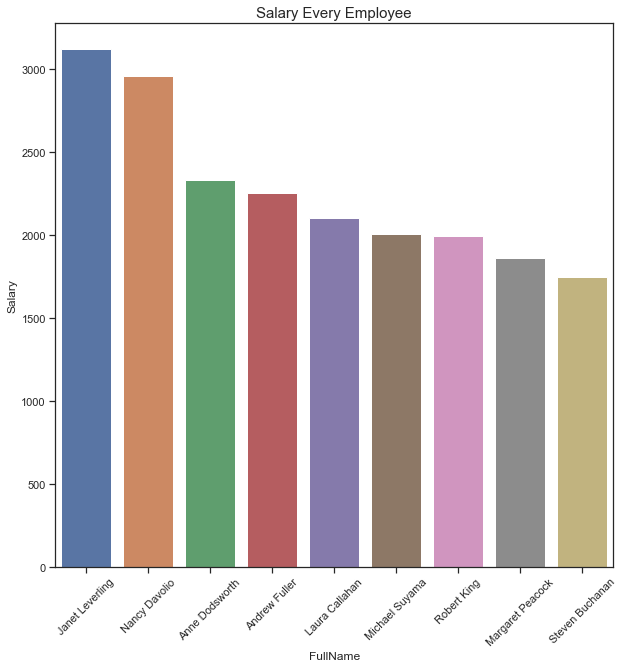

In [233]:
sns.set(style="ticks")
plt.figure(figsize=(10,10))
sns.barplot(data=df_sal, x='FullName', y='Min Salary In Time Interval')
plt.xticks(rotation=45)
plt.ylabel('Salary')
plt.title('Salary Every Employee', fontsize=15)
plt.show()

Dari data di atas menampilkan minimal dan maksimal gaji setiap karyawan diurutkan dari karyawan yang memiliki gaji tertinggi di antara 9 karyawan tersebut. Dari data tersebut, terlihat bahwa setiap karyawan memiliki gaji yang sama pada interval waktu tersebut. Artinya tidak terdapat perbedaan gaji masing-masing karyawan untuk interval waktu tersebut. Pengecekan lebih lanjut adalah sebagai berikut.

In [234]:
print(f"Jumlah karyawan adalah {df['EmployeeID'].nunique()}, sedangkan jumlah nilai unik dari kolom 'Salary' adalah {df['EmployeeID'].nunique()}.")

Jumlah karyawan adalah 9, sedangkan jumlah nilai unik dari kolom 'Salary' adalah 9.


Dari pernyataan tersebut, dapat disimpulkan bahwa tidak terdapat perbedaan/kenaikan gaji pada setiap karyawan. Hal ini diindikasikan oleh jumlah nilai unik yang sama pada 'EmployeeID' dan 'Salary'

## Is there any relation between Employee Salary and Position/Title?

Dari insight yang diperoleh sebelumnya, dapat diketahui bahwa tidak terdapat kenaikan gaji karyawan pada interval waktu di dataset tersebut. Lantas apakah terdapat kecenderungan gaji tertentu untuk sebuah posisi/title? 
Untuk itu, kita dapat menjadikan tabel/dataframe pada bagian sebelumnya sebagai dasar untuk mengidentifikasi masalah ini. Identifikasinya adalah sebagai berikut.

In [235]:
df_sal

,FullName,Title,Min Salary In Time Interval,Max Salary In Time Interval
0,Janet Leverling,Sales Representative,3119.15,3119.15
1,Nancy Davolio,Sales Representative,2954.55,2954.55
2,Anne Dodsworth,Sales Representative,2333.33,2333.33
3,Andrew Fuller,"Vice President, Sales",2254.49,2254.49
4,Laura Callahan,Inside Sales Coordinator,2100.50,2100.50
5,Michael Suyama,Sales Representative,2004.07,2004.07
6,Robert King,Sales Representative,1991.55,1991.55
7,Margaret Peacock,Sales Representative,1861.08,1861.08
8,Steven Buchanan,Sales Manager,1744.21,1744.21


Dari tabel yang dapat dibuat pada bagian sebelumnya, jika dilihat secara langsung 3 posisi teratas dengan gaji tertinggi yaitu ***Sales Representative***. Akan tetapi hal ini dapat dibilang kurang valid karena posisi tersebut juga berada pada urutan lainnya. Maka dari itu akan coba dilakukan agregasi untuk menghitung rata-rata gaji pada setiap posisi/title yang sama. Identifikasinya adalah sebagai berikut.

,Title,Salary
0,Sales Representative,2377.288333
1,"Vice President, Sales",2254.490000
2,Inside Sales Coordinator,2100.500000
3,Sales Manager,1744.210000


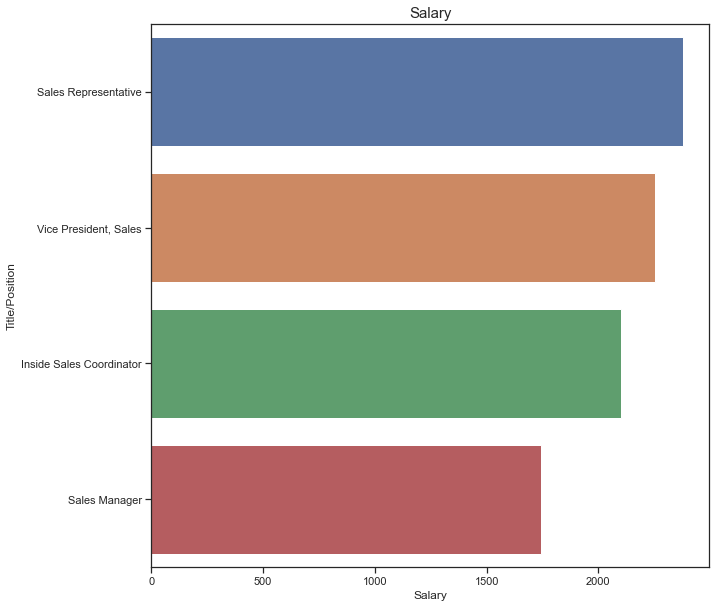

In [236]:
df_sal3 = df_sal.groupby('Title', as_index=False)['Min Salary In Time Interval'].mean()
df_sal3.rename(columns={'Min Salary In Time Interval':'Salary'}, inplace=True)

df_sal3 = df_sal3.sort_values('Salary', ascending=False).reset_index(drop=True)
display(df_sal3)

sns.set(style="ticks")
plt.figure(figsize=(10,10))
sns.barplot(data=df_sal3, y='Title', x='Salary')
plt.ylabel('Title/Position')
plt.title('Salary', fontsize=15)
plt.show()

Pada bar plot di atas. Dari agregasi dengan menggunakan fungsi rata-rata, dapat diketahui bahwa posisi dengan rata-rata gaji tertinggi yaitu ***Sales Representative***. Kemudian posisi dengan rata-rata gaji terendah yaitu ***Sales Manager***.

## Age Employee When Hired & Position

Dari data yang ada, kita ingin mengetahui apakah terdapat kecenderungan umur pada posisi/title yang diperoleh setiap karyawan saat direkrut oleh perusahaan. Hal ini dapat menjadi pertimbangan untuk perusahaan merekrut karyawan baru pada posisi terkait. Analisis lebih lanjut adalah sebagai berikut.

In [237]:
df_aa = df_new.groupby(['Title'], as_index=False)['EmployeeAgeWhenHired'].mean().sort_values('EmployeeAgeWhenHired', ascending=False)
df_aa

,Title,EmployeeAgeWhenHired
3,"Vice President, Sales",41.000000
2,Sales Representative,40.420094
1,Sales Manager,39.000000
0,Inside Sales Coordinator,37.000000


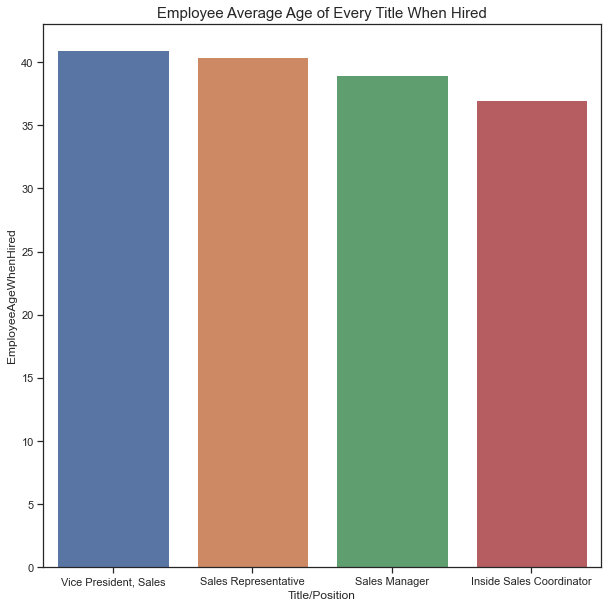

In [238]:
sns.set(style="ticks")
plt.figure(figsize=(10,10))
sns.barplot(data=df_aa, x='Title', y='EmployeeAgeWhenHired')
plt.xlabel('Title/Position')
plt.title('Employee Average Age of Every Title When Hired', fontsize=15)
plt.show()

Bar plot di atas merupakan grafik rata-rata umur karyawan terhadap posisi/title yang diperoleh. Dari data tersebut, posisi ***Vice President, Sales*** diperoleh karyawan dengan umur tertua yaitu 41 tahun. Sedangkan posisi ***Inside Sales Coordinator*** merupakan posisi yang diperoleh karyawan dengan umur termuda yaitu 37 tahun.

## Is there any relation between employee age and how many packet they packing?

Interval waktu pada dataset berkisar dari 2 hingga 3 tahun untuk setiap karyawannya. Dari data tersebut, salah satu insight yang dapat diperoleh dapat digunakan untuk keperluan efisiensi jumlah karyawan. Tolak ukur efisiensi diukur dengan cara membandingkan umur setiap karyawan terhadap jumlah paket yang ditangani kemudian memperoleh insight apakah umur karyawan mempengaruhi jumlah paket yang dihandle atau tidak. 

In [239]:
df_ep = df_new.groupby(['FullName', 'CurrentlyEmployeeAge'], as_index=False)['Quantity'].count()
df_ep

,FullName,CurrentlyEmployeeAge,Quantity
0,Andrew Fuller,45,37
1,Andrew Fuller,46,99
2,Andrew Fuller,47,96
3,Anne Dodsworth,31,19
4,Anne Dodsworth,32,58
5,Anne Dodsworth,33,27
6,Janet Leverling,33,18
7,Janet Leverling,34,132
8,Janet Leverling,35,171
9,Laura Callahan,39,42


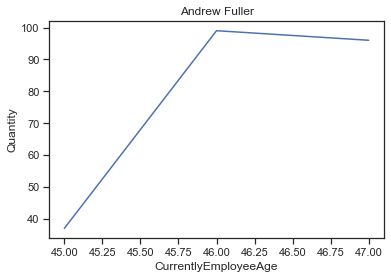

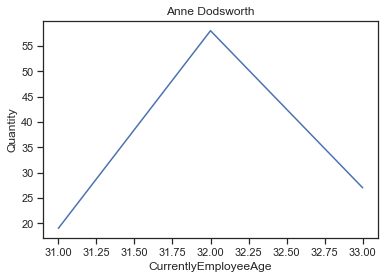

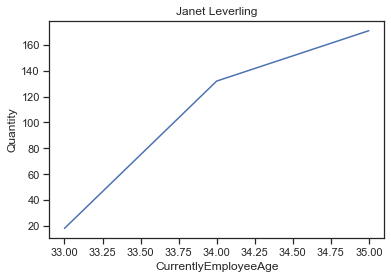

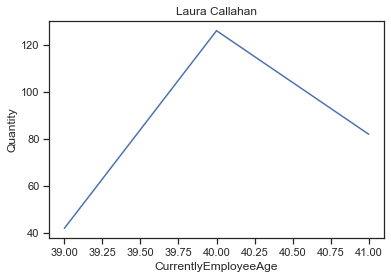

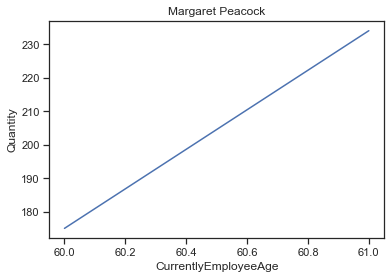

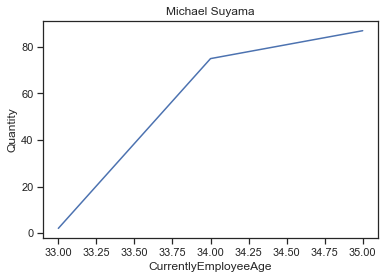

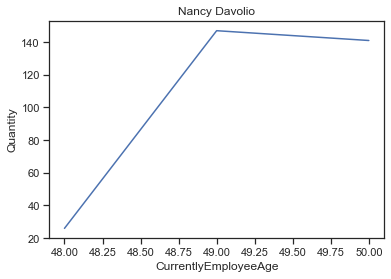

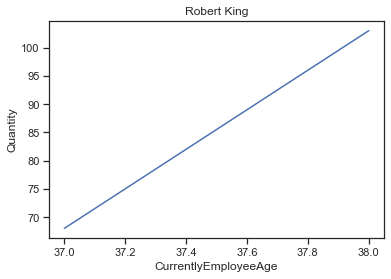

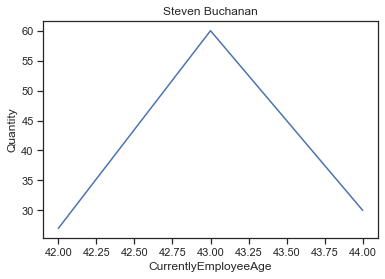

In [240]:
for name in df_ep['FullName'].unique():
    sns.lineplot(x=df_ep[df_ep['FullName'] == name]['CurrentlyEmployeeAge'], y=df_ep[df_ep['FullName'] == name]['Quantity'])
    plt.title(name)
    plt.show()

Dari plot tersebut, 6 dari 9 karyawan memiliki kenaikan jumlah paket yang dihandle semakin bertambahnya umur mereka. Sisanya cenderung fluktuatif untuk interval waktu tersebut. 

-Contoh lainnya karyawan dengan nama ***Anne Dodsworth***, jumlah paket yang ditangani selama interval waktu hanya 107 paket. Hal ini dapat menjadi , karena ketika diperhatikan lebih lanjut umur karyawan ini baru 31 tahun yang artinya paling muda dibandingkan karyawan lainnya.

Selain itu jika dilihat pada 2 karyawan lainnya yang cenderung fluktuatif, umurnya berkisar dari 39-42 tahun. 
Dari data ini, dapat disimpulkan bahwa bisa jadi umur menjadi salah satu faktor karyawan dapat menghandle banyaknya jumlah paket, akan tetapi hal ini tidak dapat ditentukan secara pasti karena hal ini bukan menjadi satu-satunya faktor. Faktor lainnya bisa saja tergantung kepada trend brand perusahaan pada waktu tersebut, kategori barang, dsb

## Most Frequent Category Every Employee

Pada bagian ini akan dianalisis apakah seorang karyawan memiliki kecenderungan menangani suatu kategori lebih banyak dari kategori lainnya. Hal ini dapat mengindikasikan keahlian penanganan suatu kategori produk dibandingkan kategori produk lainnya. Pertama kali yang akan dilakukan adalah mencari proporsi setiap kategori produk seperti di bawah ini.

,Category,Frequency
0,Beverages,389
1,Dairy Products,355
2,Confections,324
3,Seafood,319
4,Condiments,207
5,Grains/Cereals,191
6,Meat/Poultry,169
7,Produce,128


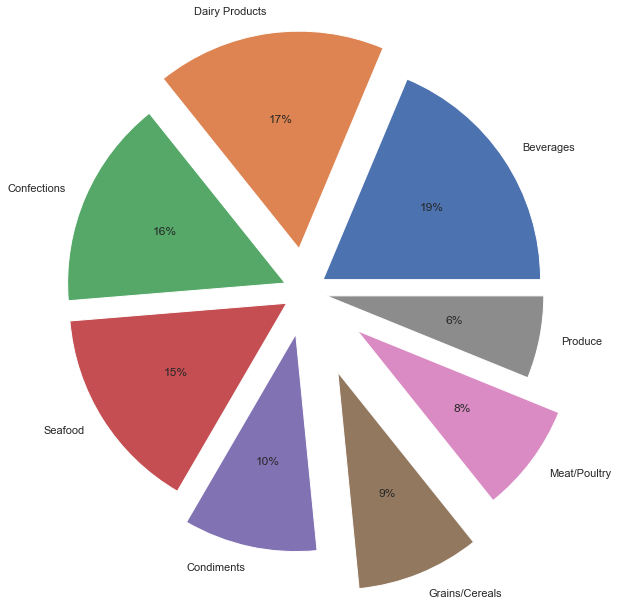

In [241]:
df_dd = pd.DataFrame(df_new['CategoryName'].value_counts()).rename(columns={'CategoryName':'Frequency'}).reset_index().rename(columns={'index': 'Category'})
display(df_dd)

plt.figure(figsize=(10,10))
plt.pie(df_dd['Frequency'], labels = df_dd['Category'], autopct='%.0f%%', explode= (0.1, 0.2, 0.1, 0.1, 0.2, 0.4, 0.3, 0.1))
plt.show()

Dari grafik pie chart di atas, dapat diketahui bahwa proporsi yang paling tinggi pada kategori produk yaitu ***Beverages***. Sedangkan proporsi yang paling rendah yaitu ***Produce***. Untuk selanjutnya akan dicari setiap proporsi untuk masing-masing karyawan seperti di bawah ini.

,FullName,CategoryName,UnitsOnOrder
0,Andrew Fuller,Beverages,42
1,Andrew Fuller,Condiments,24
2,Andrew Fuller,Confections,34
3,Andrew Fuller,Dairy Products,33
4,Andrew Fuller,Grains/Cereals,27
...,...,...,...
67,Steven Buchanan,Dairy Products,31
68,Steven Buchanan,Grains/Cereals,9
69,Steven Buchanan,Meat/Poultry,11
70,Steven Buchanan,Produce,10


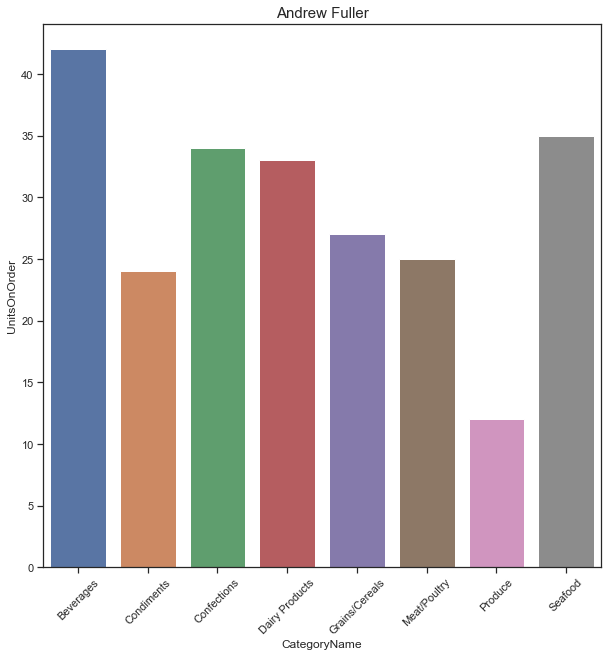

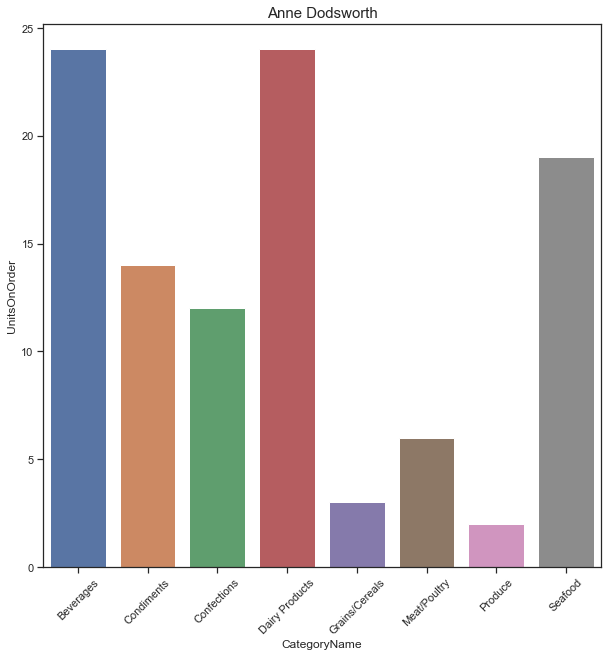

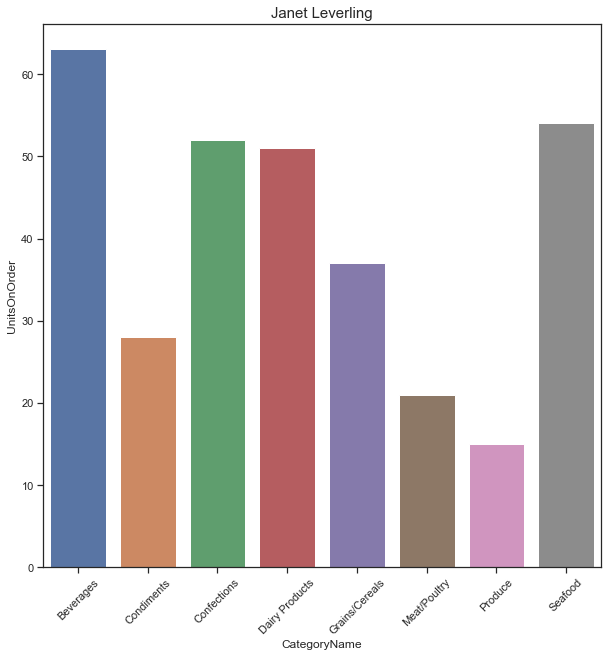

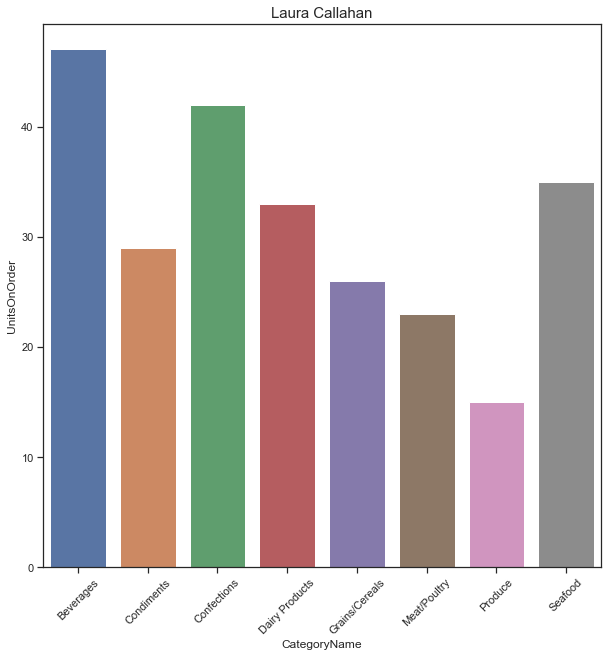

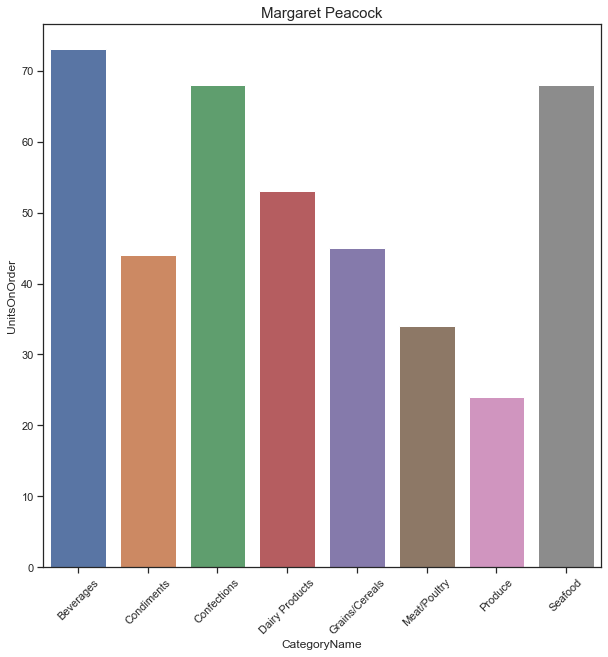

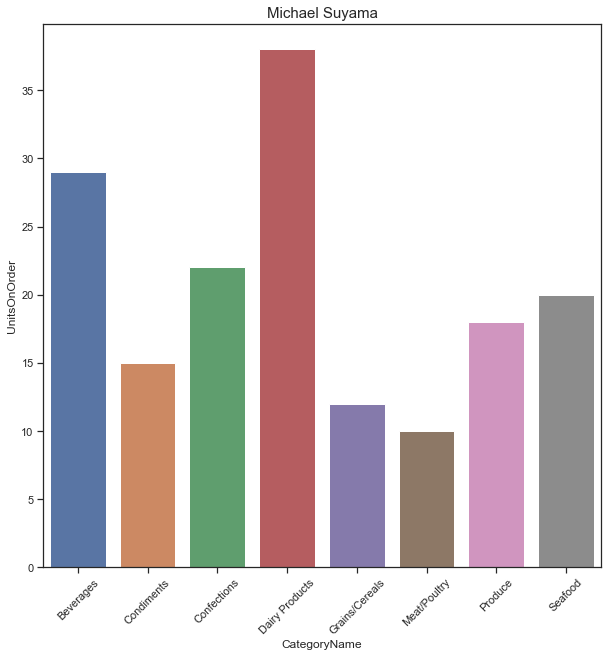

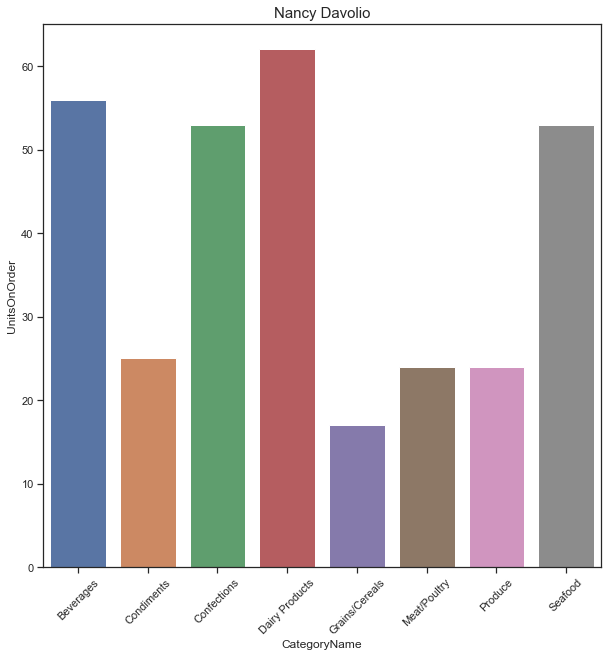

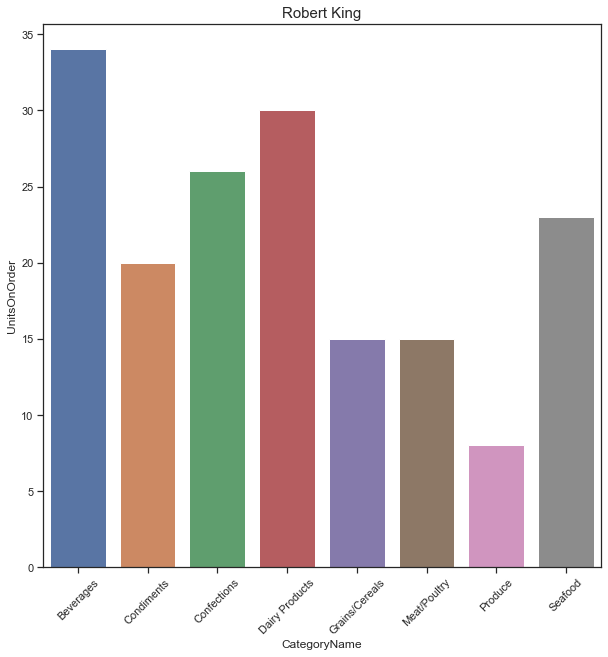

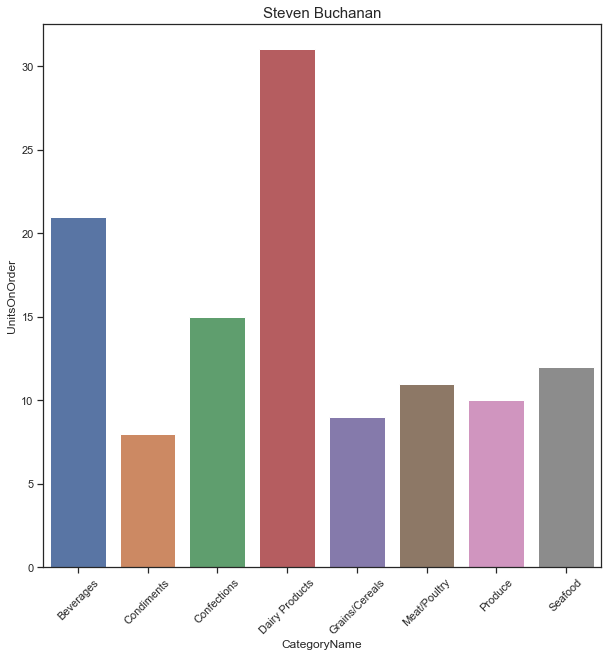

In [242]:
df_bb = df_new.groupby(['FullName', 'CategoryName'], as_index=False)['UnitsOnOrder'].count()
display(df_bb)

for name in df_bb['FullName'].unique():
    sns.set(style="ticks")
    plt.figure(figsize=(10,10))
    sns.barplot(data=df_bb, x=df_bb[df_bb['FullName'] == name]['CategoryName'], y=df_bb[df_bb['FullName'] == name]['UnitsOnOrder'])
    plt.xticks(rotation=45)
    plt.title(name, fontsize=15)
    plt.show()

6 dari 9 karyawan menangani shipping terbanyak pada kategori ***Beverages***, sedangkan 3 lainnya menangani shipping terbanyak pada kategori ***Daily Products***.

## Best Employee Based on Shipping Handle

Selanjutnya akan dilakukan analisis untuk mengetahui karyawan terbaik berdasarkan total shipping dan omzet yang diperoleh masing-masing karyawan. Hasil dapat dijadikan untuk acuan kompensasi/bonus yang akan diberikan oleh perusahaan.

In [243]:
df_ff = pd.DataFrame(data=df_new['FullName'].value_counts()).rename(columns={'FullName':'Total Shipping'}).reset_index().rename(columns={'index': 'FullName'}).sort_values('FullName').reset_index(drop=True)
df_gg = df_new.groupby('FullName', as_index=False)['Price'].sum()
df_hh = df_new.groupby('FullName', as_index=False)['ShippingTime'].mean()
df_ff['Accumulation Price'] = df_gg['Price']
df_ff['Shipping Time'] = df_hh['ShippingTime']

print('Sort by Total Shipping:')
display(df_ff.sort_values('Total Shipping', ascending=False))

print('\n\nSort by Accumulation Price:')
display(df_ff.sort_values('Accumulation Price', ascending=False))

print('\n\nSort by Shipping Time:')
display(df_ff.sort_values('Shipping Time', ascending=True))

Sort by Total Shipping:


,FullName,Total Shipping,Accumulation Price,Shipping Time
4,Margaret Peacock,409,242694.45,8.623472
2,Janet Leverling,321,213051.30,8.529595
6,Nancy Davolio,314,197169.11,7.496815
3,Laura Callahan,250,129772.67,8.620000
0,Andrew Fuller,232,173737.76,8.245690
7,Robert King,171,136103.19,8.280702
5,Michael Suyama,164,76812.60,8.542683
8,Steven Buchanan,117,75567.75,6.752137
1,Anne Dodsworth,104,82106.00,10.394231




Sort by Accumulation Price:


,FullName,Total Shipping,Accumulation Price,Shipping Time
4,Margaret Peacock,409,242694.45,8.623472
2,Janet Leverling,321,213051.30,8.529595
6,Nancy Davolio,314,197169.11,7.496815
0,Andrew Fuller,232,173737.76,8.245690
7,Robert King,171,136103.19,8.280702
3,Laura Callahan,250,129772.67,8.620000
1,Anne Dodsworth,104,82106.00,10.394231
5,Michael Suyama,164,76812.60,8.542683
8,Steven Buchanan,117,75567.75,6.752137




Sort by Shipping Time:


,FullName,Total Shipping,Accumulation Price,Shipping Time
8,Steven Buchanan,117,75567.75,6.752137
6,Nancy Davolio,314,197169.11,7.496815
0,Andrew Fuller,232,173737.76,8.245690
7,Robert King,171,136103.19,8.280702
2,Janet Leverling,321,213051.30,8.529595
5,Michael Suyama,164,76812.60,8.542683
3,Laura Callahan,250,129772.67,8.620000
4,Margaret Peacock,409,242694.45,8.623472
1,Anne Dodsworth,104,82106.00,10.394231


Berdasarkan ***Total Shipping dan Accumulation Price***, karyawan dengan posisi 3 teratas yaitu ***Margaret Peacock, Janet Leverling, dan Nancy Davolio***. Sedangkan berdasarkan waktu shipping tercepat, karyawan yang menempati posisi teratas adalah ***Steven Buchanan*** yang rata-rata memiliki ```shipping time``` sebesar 6.75 hari.